In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
hf_df = pd.read_excel("Data/hedge_funds_returns_data.xlsx")

short_mapping = {
    'Date': 'Date',
    'HFRI 400 (US) Fund Weighted Composite Index (HFRI4FWC)': 'HFRI4FWC',
    'HFRI 400 (US) EH: Long/Short Index (HFRI4ELS)': 'HFRI4ELS',
    'HFRI 400 (US) EH: Fundamental Value Index (HFRI4EHV)': 'HFRI4EHV',
    'HFRI 400 (US) Event-Driven Index (HFRI4ED)': 'HFRI4ED'
    
}

hf_df = hf_df.rename(columns=short_mapping)
# ADD THESE LINES TO FIX THE ISSUE:
hf_df['Date'] = pd.to_datetime(hf_df['Date'])
hf_df = hf_df.set_index('Date')
hf_df.head()

,HFRI4FWC,HFRI4ELS,HFRI4ED,HFRI4EHV
Date,,,,
2005-01-31,0.0047,0.0067,0.0012,0.0049
2005-02-28,0.0198,0.0279,0.0111,0.0219
2005-03-31,-0.0103,-0.0172,0.0002,-0.0111
2005-04-29,-0.0124,-0.0165,-0.0105,-0.0137
2005-05-31,0.0079,0.0122,0.0064,0.0122


In [3]:
# Read the Excel files
portfolio_weights_05 = pd.read_excel('all_output_results/agg_portfolio_weights.xlsx')
portfolio_weights_10 = pd.read_excel('all_output_results/cons_portfolio_weights.xlsx')

In [23]:
portfolio_weights_05.head()

,Quarter,HFRI4FWC,HFRI4ELS,HFRI4EHV,HFRI4ED
0,Q1 2012,0.000000,0.000000,1.000000,0.0
1,Q2 2012,1.000000,0.000000,0.000000,0.0
2,Q3 2012,0.290184,0.318241,0.391575,0.0
3,Q4 2012,0.656132,0.000000,0.343868,0.0
4,Q1 2013,0.000000,0.000000,1.000000,0.0


In [24]:
def calculate_monthly_portfolio_returns():
    """Calculate monthly portfolio returns for both risk aversion levels"""
    
    # Get fund columns (exclude 'Quarter' column)
    fund_columns = [col for col in portfolio_weights_05.columns if col != 'Quarter']
    
    # Create a dictionary to store weights by quarter
    weights_dict_05 = {}
    weights_dict_10 = {}
    
    # Process weights from both DataFrames
    for _, row in portfolio_weights_05.iterrows():
        quarter = row['Quarter']
        weights = []
        for fund in fund_columns:
            weight = row[fund]
            if isinstance(weight, str) and '%' in weight:
                weight = float(weight.replace('%', '')) / 100
            weights.append(weight)
        weights_dict_05[quarter] = weights
    
    for _, row in portfolio_weights_10.iterrows():
        quarter = row['Quarter']
        weights = []
        for fund in fund_columns:
            weight = row[fund]
            if isinstance(weight, str) and '%' in weight:
                weight = float(weight.replace('%', '')) / 100
            weights.append(weight)
        weights_dict_10[quarter] = weights
    
    # Function to get quarter from date
    def get_quarter_from_date(date):
        year = date.year
        quarter_num = (date.month - 1) // 3 + 1
        return f"Q{quarter_num} {year}"
    
    # Calculate monthly returns
    monthly_returns_data = []
    
    for date in hf_df.index:
        quarter = get_quarter_from_date(date)
        
        # Check if we have weights for this quarter
        if quarter in weights_dict_05 and quarter in weights_dict_10:
            # Get monthly returns for all funds
            monthly_fund_returns = hf_df.loc[date, fund_columns].values
            
            # Calculate portfolio returns
            portfolio_return_05 = sum(w * r for w, r in zip(weights_dict_05[quarter], monthly_fund_returns))
            portfolio_return_10 = sum(w * r for w, r in zip(weights_dict_10[quarter], monthly_fund_returns))
            
            # Multiply by 100 to get percentage returns
            monthly_returns_data.append({
                'Date': date,
                'Risk_Aversion_05': portfolio_return_05,
                'Risk_Aversion_10': portfolio_return_10
            })
    
    # Create DataFrame
    df_monthly_returns = pd.DataFrame(monthly_returns_data)
    df_monthly_returns.set_index('Date', inplace=True)
    
    return df_monthly_returns

In [25]:
# Calculate monthly returns
df_monthly_returns = calculate_monthly_portfolio_returns()
print(f"Total months processed: {len(df_monthly_returns)}")

# Display first few rows
print("\nFirst 10 rows of monthly returns:")
print(df_monthly_returns.head(10))

Total months processed: 135

First 10 rows of monthly returns:
            Risk_Aversion_05  Risk_Aversion_10
Date                                          
2012-01-31          0.037200          0.037200
2012-02-29          0.031600          0.031600
2012-03-30          0.006100          0.006100
2012-04-30         -0.002300         -0.002300
2012-05-31         -0.021500         -0.021500
2012-06-29          0.001000          0.001000
2012-07-31          0.004740          0.001268
2012-08-31          0.010643          0.012832
2012-09-28          0.015937          0.016632
2012-10-31         -0.000924         -0.000924


In [26]:
# First, let's check what type of data we actually have
print("Data types:")
print(df_monthly_returns.dtypes)
print("\nFirst few rows:")
print(df_monthly_returns.head())
print("\nSample values:")
print("Risk_Aversion_05 sample:", df_monthly_returns['Risk_Aversion_05'].iloc[0])
print("Type:", type(df_monthly_returns['Risk_Aversion_05'].iloc[0]))

Data types:
Risk_Aversion_05    float64
Risk_Aversion_10    float64
dtype: object

First few rows:
            Risk_Aversion_05  Risk_Aversion_10
Date                                          
2012-01-31            0.0372            0.0372
2012-02-29            0.0316            0.0316
2012-03-30            0.0061            0.0061
2012-04-30           -0.0023           -0.0023
2012-05-31           -0.0215           -0.0215

Sample values:
Risk_Aversion_05 sample: 0.0372
Type: <class 'numpy.float64'>


<Figure size 1500x600 with 0 Axes>

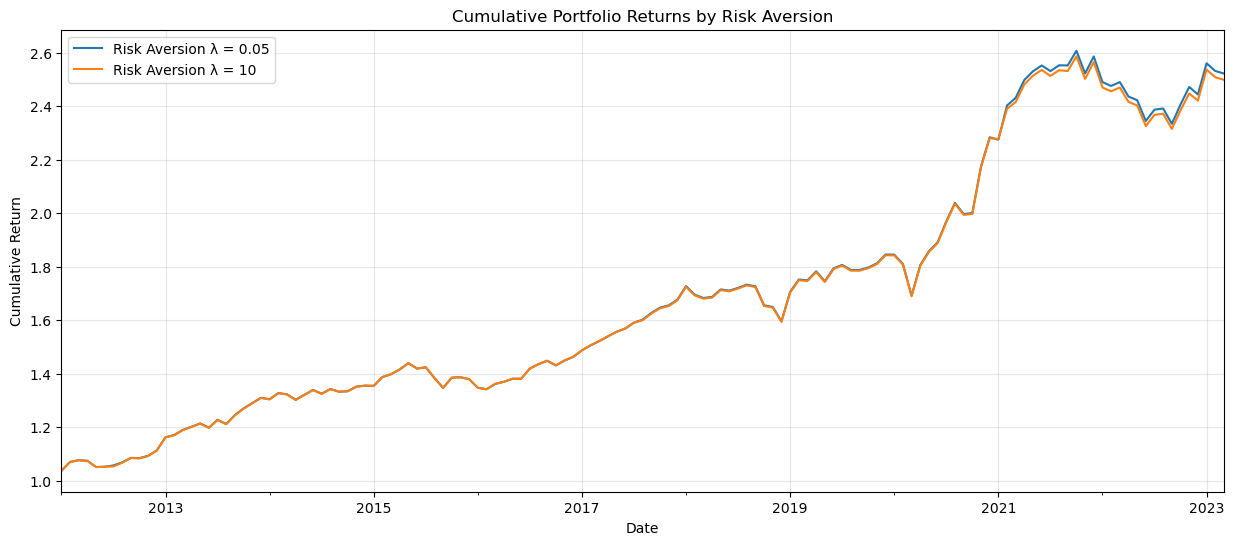


Cumulative return stats:
Risk Aversion 0.05 - Final cumulative return: 2.5226
Risk Aversion 10 - Final cumulative return: 2.4990
            Risk_Aversion_05  Risk_Aversion_10
Date                                          
2012-01-31          1.037200          1.037200
2012-02-29          1.069976          1.069976
2012-03-30          1.076502          1.076502
2012-04-30          1.074026          1.074026
2012-05-31          1.050935          1.050935


In [27]:
df_monthly_returns_numeric = df_monthly_returns.copy()

asset_cum_returns = (1 + df_monthly_returns_numeric).cumprod()

plt.figure(figsize=(15, 6))
asset_cum_returns.plot(figsize=(15, 6), title='Cumulative Portfolio Returns by Risk Aversion')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend(['Risk Aversion λ = 0.05', 'Risk Aversion λ = 10'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nCumulative return stats:")
print(f"Risk Aversion 0.05 - Final cumulative return: {asset_cum_returns['Risk_Aversion_05'].iloc[-1]:.4f}")
print(f"Risk Aversion 10 - Final cumulative return: {asset_cum_returns['Risk_Aversion_10'].iloc[-1]:.4f}")

print(asset_cum_returns.head())

In [28]:
asset_perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown'])
# calculate performance
asset_perf['return'] = (asset_cum_returns.iloc[-1] ** (1/(asset_cum_returns.shape[0]/12)) - 1) * 100
asset_perf['vol'] = df_monthly_returns.std() * np.sqrt(12) * 100
asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
asset_perf['Max Drawdown'] = (1 - asset_cum_returns/asset_cum_returns.cummax()).max() * 100
asset_perf

,return,vol,Sharpe,Max Drawdown
Risk_Aversion_05,8.572332,7.430682,1.153640,10.488248
Risk_Aversion_10,8.481738,7.392252,1.147382,10.488248
